<a href="https://colab.research.google.com/github/kavishwar125/Summer-Training/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("/content/Clean_Dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.shape

(300153, 12)

In [5]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

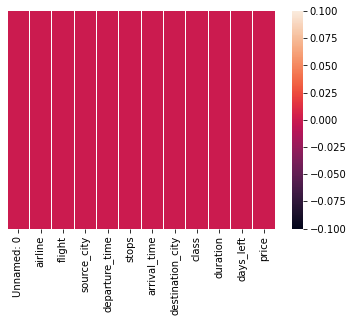

In [6]:
sns.heatmap(df.isnull(),yticklabels = False)

In [7]:
df.drop(["Unnamed: 0","flight"],axis = 1,inplace = True)

In [8]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

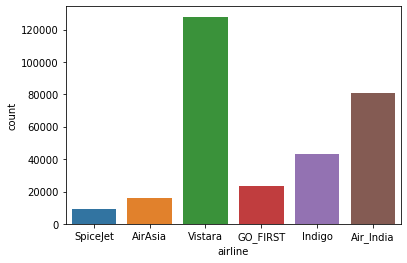

In [10]:
sns.countplot(x = "airline",data = df)

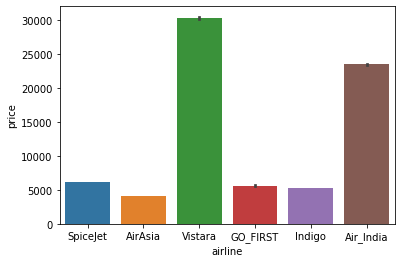

In [11]:
sns.barplot(x = "airline",y = "price",data = df)

In [12]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [13]:
cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class']

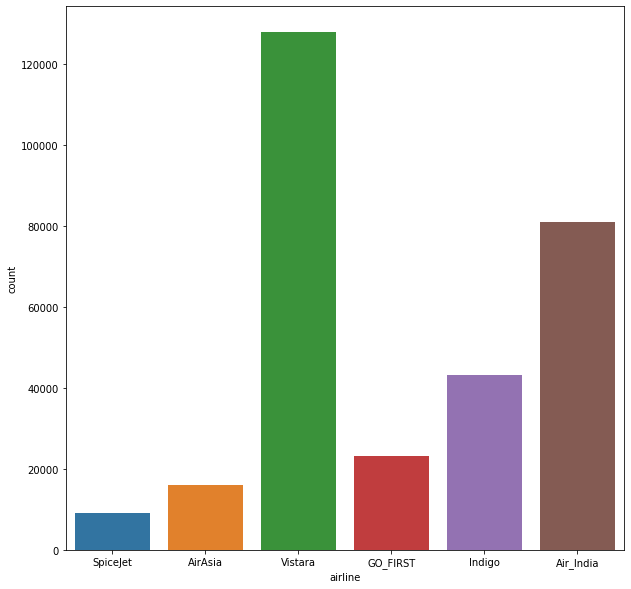

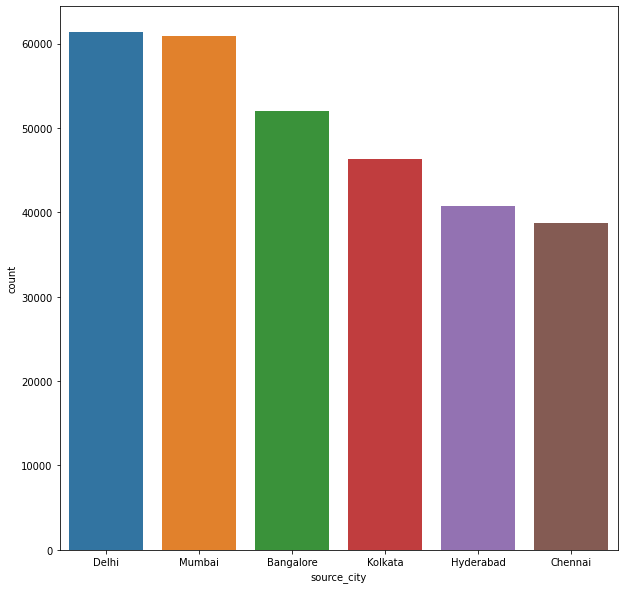

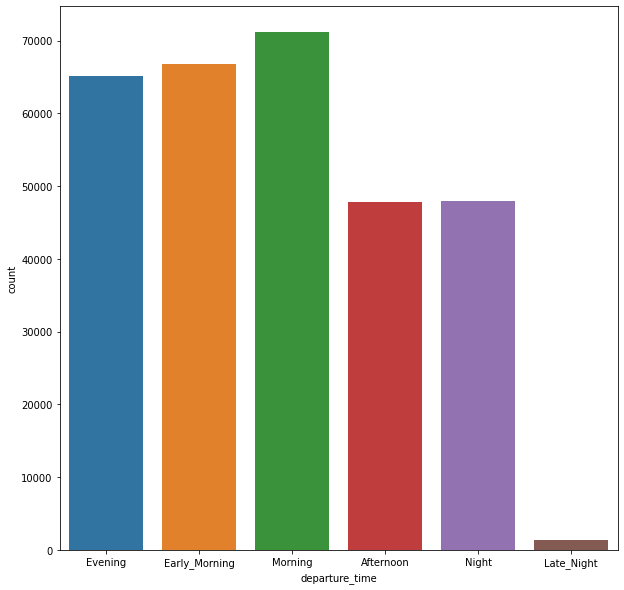

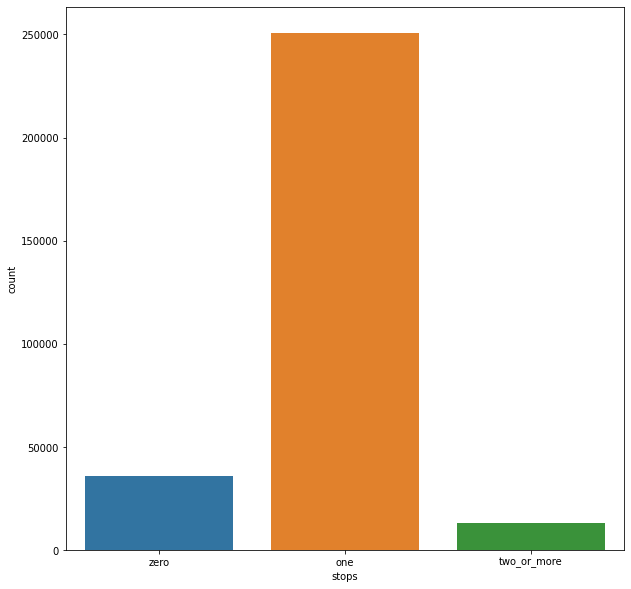

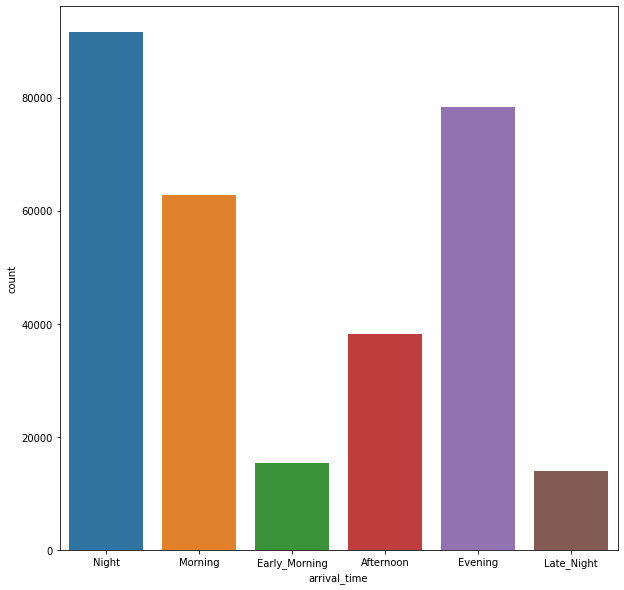

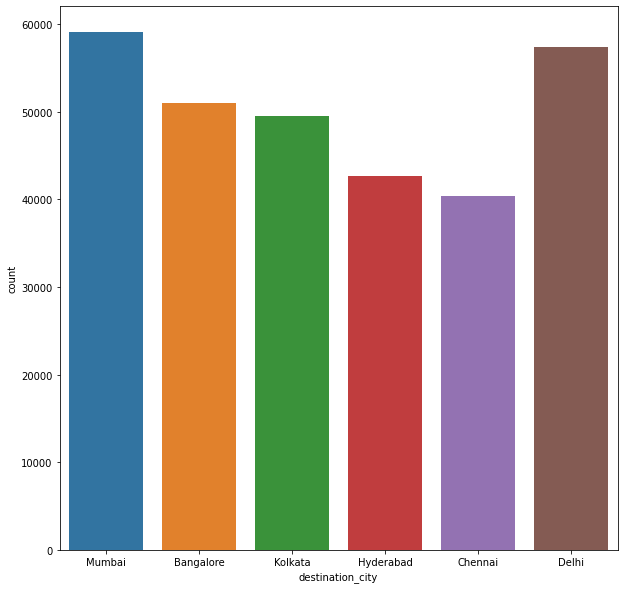

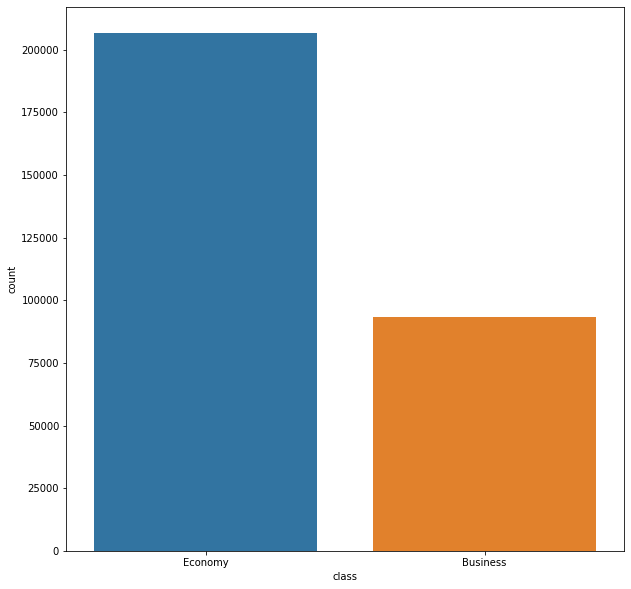

In [14]:
for i in range(0,len(cols)):
  plt.figure(figsize = (10,10))
  sns.countplot(x = cols[i],data = df)

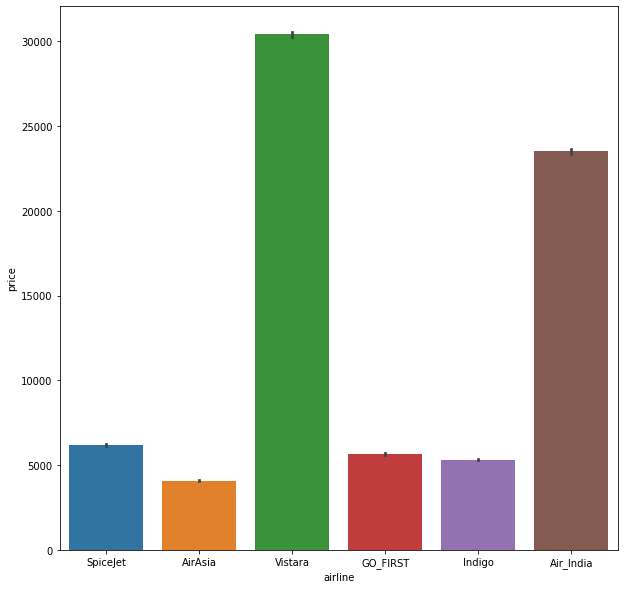

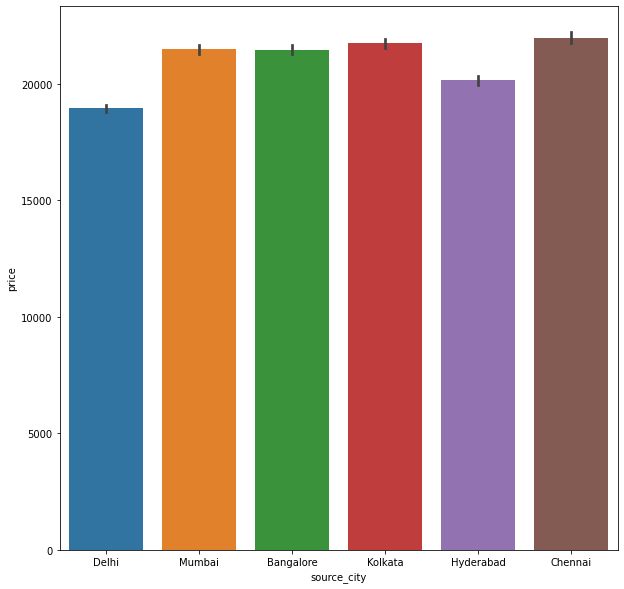

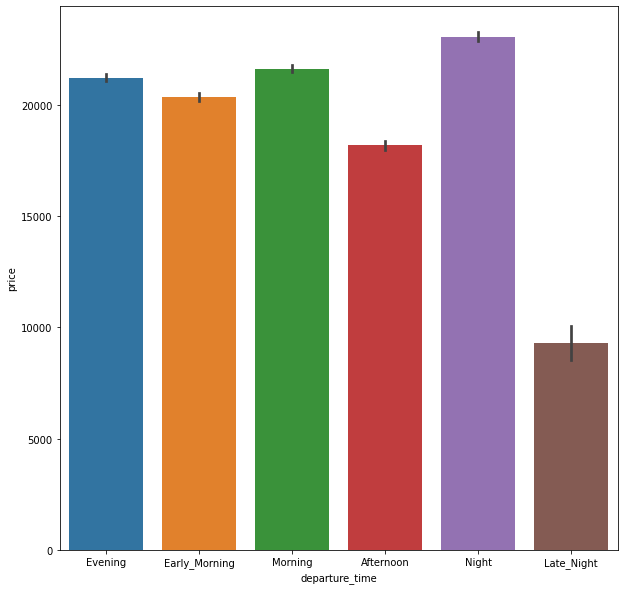

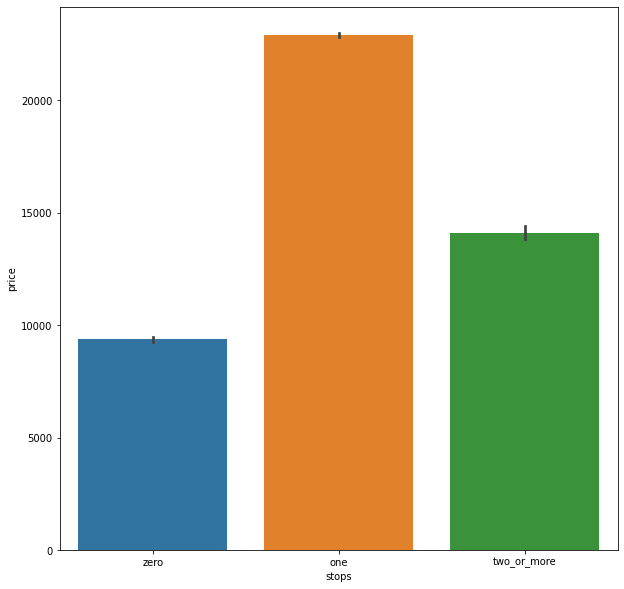

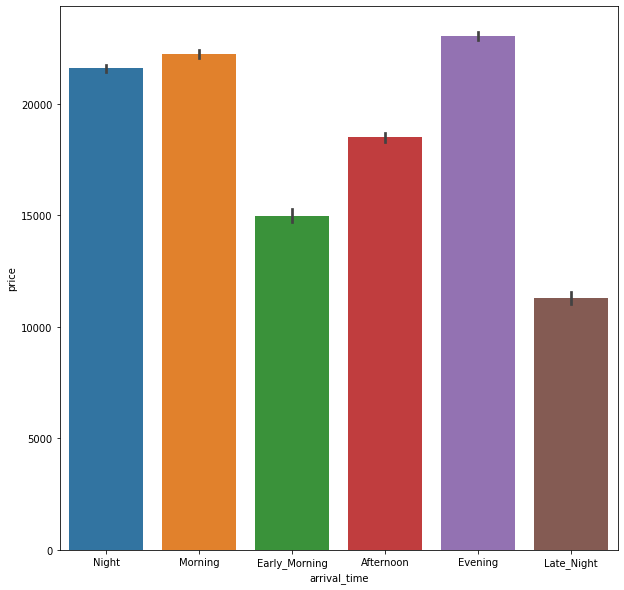

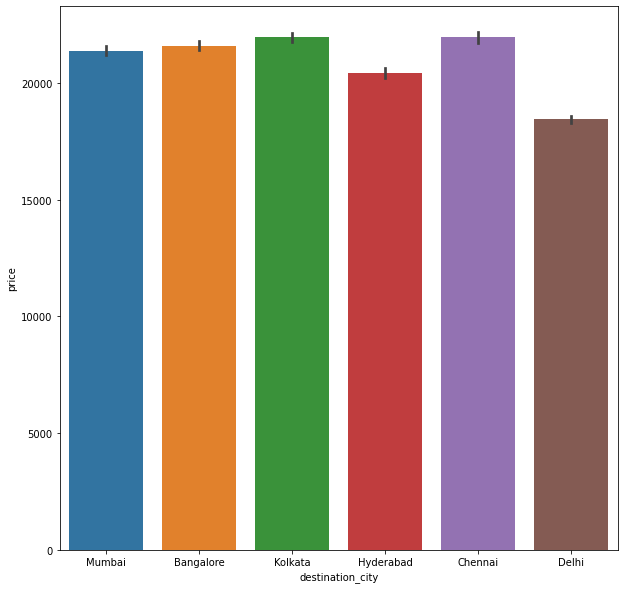

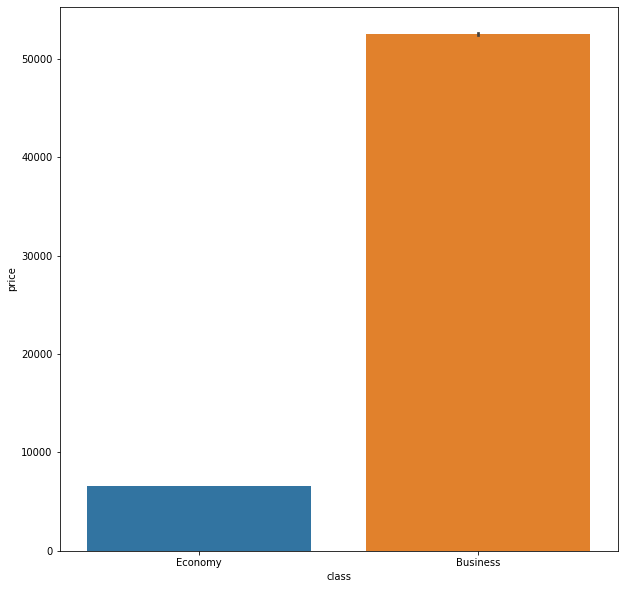

In [15]:
for i in range(0,len(cols)):
  plt.figure(figsize = (10,10))
  sns.barplot(x = cols[i],y = "price",data = df)

In [16]:
d = df

In [17]:
df1 = pd.get_dummies(d)

In [18]:
df1.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [19]:
df1.columns

Index(['duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business',
       'class_Economy'],
      dtype='object')

In [20]:
df1.shape

(300153, 38)

In [21]:
df1.drop(["airline_AirAsia","source_city_Bangalore","departure_time_Afternoon","stops_one","arrival_time_Afternoon","destination_city_Bangalore","class_Business"],axis = 1,inplace = True)

In [22]:
df1

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
300149,10.42,49,77105,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300150,13.83,49,79099,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300151,10.00,49,81585,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [23]:
df1.shape

(300153, 31)

In [24]:
x = df1.drop(["price"],axis = 1).values
y = df1["price"].values

In [25]:
x

array([[ 2.17,  1.  ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [ 2.33,  1.  ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [ 2.17,  1.  ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       ...,
       [13.83, 49.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [10.  , 49.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [10.08, 49.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [26]:
y

array([ 5953,  5953,  5956, ..., 79099, 81585, 81585])

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-1.39753079, -1.84387477, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       [-1.3752838 , -1.84387477, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       [-1.39753079, -1.84387477, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       ...,
       [ 0.22371837,  1.69569214, -0.60739623, ..., -0.44457466,
        -0.49513513, -1.48682175],
       [-0.30881888,  1.69569214, -0.60739623, ..., -0.44457466,
        -0.49513513, -1.48682175],
       [-0.29769538,  1.69569214, -0.60739623, ..., -0.44457466,
        -0.49513513, -1.48682175]])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state = 0)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
pred = lr.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
print(r2_score(pred,y_test))

0.9037846140992645


In [32]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)

# Predicting R2 Score the Train set results
y_pred_linear_train = lr.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
r2_score_linear_test = r2_score(y_test, pred)

# Predicting RMSE the Test set results
rmse_linear = np.sqrt(MSE)
print("MSE: ", MSE)
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

MSE:  44950238.538583115
R2_score (train):  0.9112960535724197
R2_score (test):  0.9120895441788929
RMSE:  6704.493906223132


In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
regressor_poly3 = LinearRegression()
regressor_poly3.fit(x_poly, y_train)

LinearRegression()

In [34]:
regressor_poly3_pred = regressor_poly3.predict(poly_reg.fit_transform(x_test))
regressor_poly3_pred

array([10313.7260437 , 59304.7429657 ,  7013.42388916, ...,
        8268.30664062,  7154.04360962,  7245.52984619])

In [43]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

MSE1 = mean_squared_error(y_test, regressor_poly3_pred)

# Predicting R2 Score the Train set results
y_pred_poly_train = regressor_poly3.predict(x_poly)
r2_score_poly_train = r2_score(y_train, y_pred_linear_train1)

# Predicting R2 Score the Test set results
y_pred_poly_test = regressor_poly3.predict(poly_reg.fit_transform(x_test))
r2_score_poly_test = r2_score(y_test, y_pred_linear_test1)

# Predicting RMSE the Test set results
rmse_poly = np.sqrt(MSE1)
print("MSE: ", MSE1)
print('R2_score (train): ', r2_score_poly_train)
print('R2_score (test): ', r2_score_poly_test)
print("RMSE: ", rmse_poly)

MSE:  24660538.492374286
R2_score (train):  0.9510835667885951
R2_score (test):  0.9517706857595929
RMSE:  4965.937826068132


In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(y_test,regressor_dt.predict(x_test))

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(x_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(x_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = np.sqrt(MSE2)
print("MSE: ", MSE2)
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

MSE:  12102286.883479184
R2_score (train):  0.9992847966145809
R2_score (test):  0.9763312144497021
RMSE:  3478.834127043022


In [50]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, MSE),
          ('Polynomial Regression (2nd)', rmse_poly, r2_score_poly_train, r2_score_poly_test, MSE1),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, MSE2),
         ]

In [53]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'MSE'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),MSE
0,Linear Regression,6704.493906,0.911296,0.912090,4.495024e+07
1,Polynomial Regression (2nd),4965.937826,0.951084,0.951771,2.466054e+07
2,Decision Tree Regression,3478.834127,0.999285,0.976331,1.210229e+07


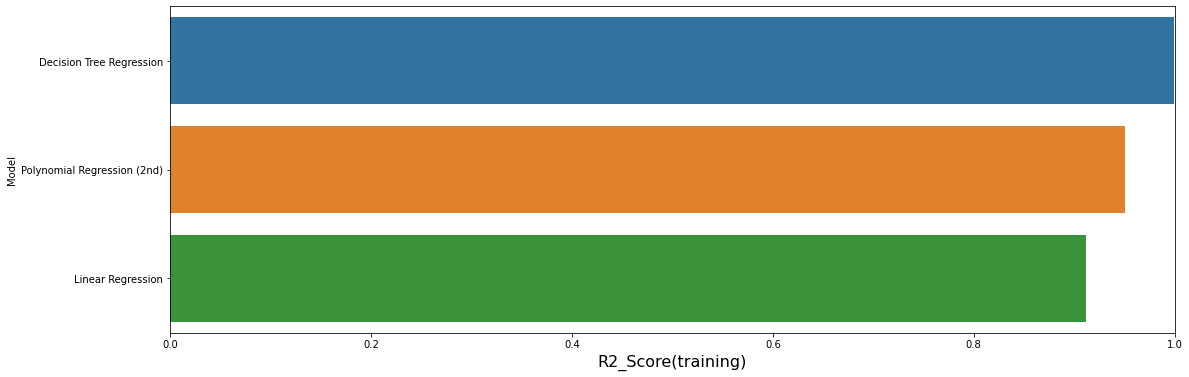

In [54]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('R2_Score(training)', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

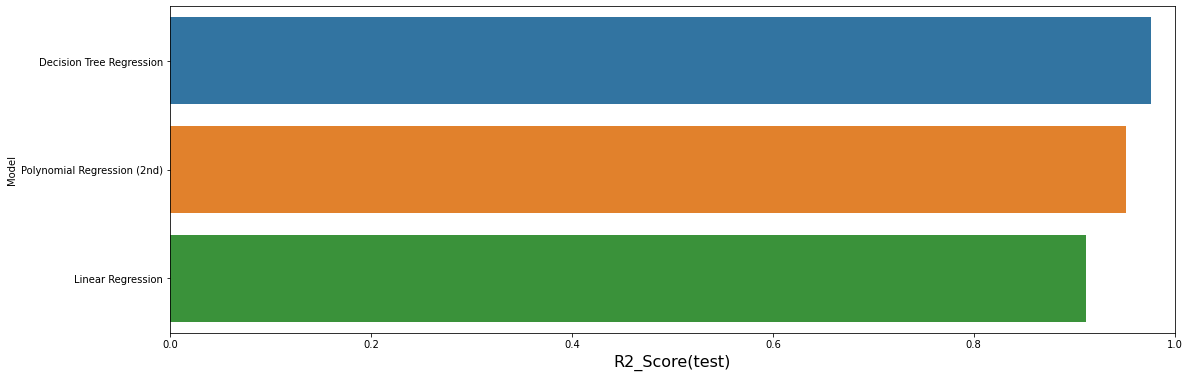

In [58]:
f, axe = plt.subplots(1,1, figsize=(18,6))
predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('R2_Score(test)', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

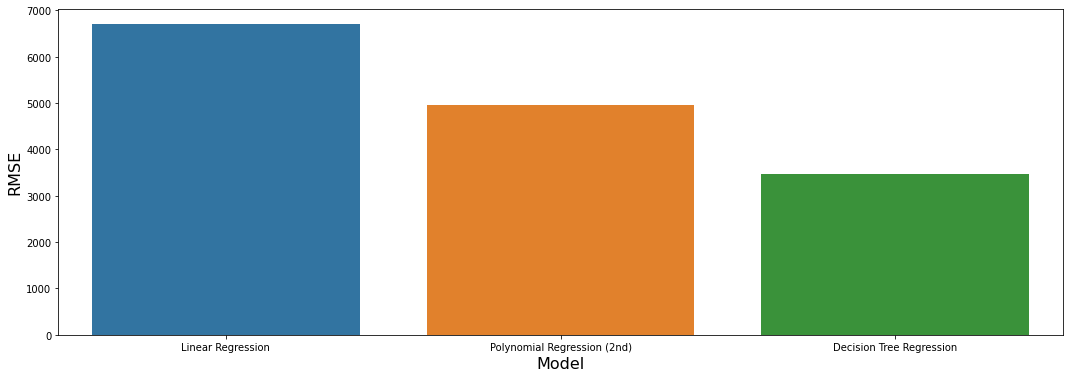

In [57]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()